**NAME** : Pratik Vijay Bhagyawant\
**CLASS** : BE-AIDS\
**ROLL No** : 2547008\
**Batch** : A\
**SUB** : Computer Laboratory II (Information Retrieval)

**Problem Statement**: Implement e-mail spam filtering using text classification algorithm with appropriate dataset.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("emails.csv")

In [3]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [5]:
df.columns

Index(['text', 'spam'], dtype='object')

In [6]:
df.shape

(5728, 2)

In [7]:
df['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

In [8]:
df.duplicated().sum()

33

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df['spam'].value_counts()

spam
0    4327
1    1368
Name: count, dtype: int64

In [12]:
df.shape

(5695, 2)

In [13]:
x=df['text']
y=df['spam']


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=43)

In [15]:
vectorize=TfidfVectorizer(stop_words="english",lowercase=True)

In [16]:
x_train_tfidf=vectorize.fit_transform(x_train)
x_test_tfidf=vectorize.transform(x_test)

In [17]:
model=LogisticRegression(max_iter=1000)

In [18]:
model.fit(x_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [19]:
y_pred=model.predict(x_test_tfidf)

In [20]:
print("accuracy score:",accuracy_score(y_test,y_pred))

accuracy score: 0.9817415730337079


In [21]:
print("classification report",classification_report(y_test,y_pred))

classification report               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1081
           1       0.99      0.93      0.96       343

    accuracy                           0.98      1424
   macro avg       0.99      0.96      0.97      1424
weighted avg       0.98      0.98      0.98      1424



In [22]:
print("confusion matrix",confusion_matrix(y_test,y_pred))

confusion matrix [[1079    2]
 [  24  319]]


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

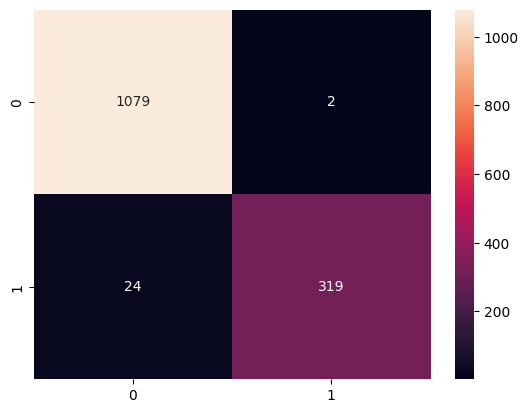

In [24]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')

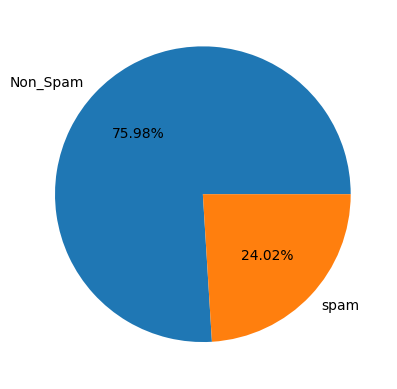

In [25]:
spam_count=df['spam'].value_counts()
plt.pie(spam_count,autopct="%0.2f%%",labels=['Non_Spam','spam'])
plt.show()

In [26]:
test_emails=["Congratulations! You’ve won a ₹10,000 gift card. Click the link to claim now!"]

In [27]:
test_tfidf=vectorize.transform(test_emails)

In [28]:
predictions=model.predict(test_tfidf)

In [29]:
for i in range (len(test_emails)):
    email=test_emails[0]
    pred=predictions[0]
    if pred==1:
        print(email,"\n spam")
    else:
        print(email,"\n not spam")

Congratulations! You’ve won a ₹10,000 gift card. Click the link to claim now! 
 spam
